In [ ]:
# Feel free to make minor changes in the format below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install autograd
!pip install torch torchvision

In [ ]:
# To use torch in python.
import torch

# To create a model by layers.
import torch.nn as nn
import torch.nn.functional as F

# To set the optimization.
import torch.optim as optim
from torch.optim import lr_scheduler

# To manipulate arrays.
import numpy as np

# To save the best model and get data files.
import os
import copy

import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

import pywt
from scipy import stats

import torch

In [ ]:
# Load the csv files over here into pandas data frame
# YOUR CODE HERE
# 0.1
def load_csv(file_name):
  # Input: csv_file_name
  # Output: pandas data frame 

In [ ]:
import os
import glob
from os.path import isfile, join
folder_name = '/content/drive/MyDrive/Spring_22/AInHC/mini_project/mitbih_database'

In [ ]:
# Get list of all files in a given directory sorted by name
for file in os.listdir(folder_name):
  list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join(folder_name, x)),
                        os.listdir(folder_name) ) )

In [ ]:
list_of_files

In [ ]:
list_of_files.remove(list_of_files[0])

In [ ]:
len(list_of_files)

88

In [ ]:
file_list = []
all_text_list = []
for file_path in list_of_files:
  if file_path.endswith('.csv'):
    #file_list.append(file_path)
    file_list.append(folder_name + "/"+ file_path)
  
  if file_path.endswith('.txt'):
    all_text_list.append(folder_name + "/"+ file_path)
  

In [ ]:
len(file_list) , len(all_text_list)

(44, 44)

In [ ]:
num_lines = sum(1 for line in open(all_text_list[1]))
num_lines

1875

In [ ]:
all_text_list[3]

'/content/drive/MyDrive/Spring_22/AInHC/mini_project/mitbih_database/103annotations.txt'

In [ ]:
count = len(open(all_text_list[3]).readlines())
count

2092

In [ ]:
with open(all_text_list[1]) as f:
    line_count = 0
    for line in f:
        line_count += 1

print(line_count)

1875


In [ ]:
# using readlines() in annot file

count = 0 
columns=['Time', 'Sample#' ,'Type','Sub' ,'Chan' , 'Num']

def read_annotation_file(file_path):
    data = []
    with open(file_path) as fp:
        allLines = fp.readlines()
        for line in allLines[1:]:
            each_line = line.strip().split()[:6]
            data.append(each_line)
    # df = pd.DataFrame(data, columns = columns)
    return data    

def read_feats_file(file_path):
    feats_dict = {}
    with open(file_path) as fp:
        allfeatslines = fp.readlines()
        headers = allfeatslines[0].strip().split(",")
        for featsline in allfeatslines[1:]:
            temp = list(map(int, featsline.strip().split(',')))
            feats_dict[temp[0]] = temp[1:]
    return headers, feats_dict

from pdb import set_trace as bp
def feats_window(sample_id, num_samples, window_length=360):
    """

    """
    start, end = 0, 0
    # border case 
    if sample_id <= ((window_length/2)+1):
        end = window_length
    elif (num_samples - sample_id) <= ((window_length/2)-1):
        start = num_samples - window_length
        end = num_samples
    else:
        start = sample_id - (window_length/2)
        end = sample_id + ((window_length/2))
    answer = list(range(int(start), int(end)))
    
    try:
        assert len(answer) == 360 and end <= num_samples
    except:
        print("In here")
    return answer

# _ = read_feats_file(file_list[0])         
#feats_window(10000, 10000)

In [ ]:
allfeats = []
for feats_path, annot_path in zip(file_list , all_text_list):
    print(f"Processing file {os.path.basename(annot_path)}")
    annt_data = read_annotation_file(annot_path) 
    headers_feats, feats_dict = read_feats_file(feats_path)
    #print(headers_feats)
    if "'MLII'" in headers_feats:
        MLII_index = headers_feats.index("'MLII'") - 1
        for row in annt_data:
            sample_id, arrh_type = int(row[1]), row[2]
            if arrh_type not in ["N", "L", "R", "A", "V"]: 
                arrh_type = "U"

            feats_window_samples = feats_window(sample_id, len(feats_dict))
            feats_for_sampleid = [feats_dict[sample_id][MLII_index] for sample_id in feats_window_samples]
            feats_for_sampleid.extend([arrh_type, feats_path, annot_path])

            allfeats.append(feats_for_sampleid)


Processing file 100annotations.txt
Processing file 101annotations.txt
Processing file 102annotations.txt
Processing file 103annotations.txt
Processing file 104annotations.txt
Processing file 105annotations.txt
Processing file 106annotations.txt
Processing file 107annotations.txt
Processing file 108annotations.txt
Processing file 109annotations.txt
Processing file 111annotations.txt
Processing file 112annotations.txt
Processing file 113annotations.txt
Processing file 114annotations.txt
Processing file 115annotations.txt
Processing file 116annotations.txt
Processing file 117annotations.txt
Processing file 118annotations.txt
Processing file 119annotations.txt
Processing file 121annotations.txt
Processing file 122annotations.txt
Processing file 123annotations.txt
Processing file 124annotations.txt
Processing file 200annotations.txt
Processing file 201annotations.txt
Processing file 202annotations.txt
Processing file 203annotations.txt
Processing file 205annotations.txt
Processing file 207a

In [ ]:
len(allfeats)

98401

In [ ]:
import pickle
with open("new_train.pkl", "wb") as fp:   #Pickling
  pickle.dump(allfeats, fp)

In [ ]:
Xy_df = pd.DataFrame(allfeats)

In [ ]:
with open("new_train_pandasDF.pkl", "wb") as fp:   #Pickling
  pickle.dump(Xy_df, fp)

In [ ]:
Xy_df

,0,1,2,3,4,5,6,7,8,9,...,353,354,355,356,357,358,359,360,361,362
0,995,995,995,995,995,995,995,995,1000,997,...,951,952,948,939,935,929,922,U,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...
1,995,995,995,995,995,995,995,995,1000,997,...,951,952,948,939,935,929,922,N,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...
2,957,956,961,964,964,966,965,966,967,969,...,958,955,955,955,960,958,957,N,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...
3,950,951,952,951,956,959,961,960,958,958,...,952,951,952,951,948,950,951,N,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...
4,946,949,952,956,957,958,957,957,959,960,...,958,957,956,957,960,956,956,N,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98396,1076,1077,1079,1081,1083,1080,1082,1083,1081,1077,...,991,988,982,975,972,968,965,N,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...
98397,1036,1040,1045,1048,1053,1060,1065,1070,1077,1081,...,935,932,925,923,916,915,909,N,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...
98398,990,994,998,1004,1007,1010,1011,1015,1013,1014,...,1015,1016,1012,1010,1003,998,991,N,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...
98399,989,992,992,995,997,1001,1007,1012,1016,1023,...,983,982,979,980,979,978,976,N,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...,/content/drive/MyDrive/Spring_22/AInHC/mini_pr...


In [ ]:
X = Xy_df.iloc[:,0:360]
y = Xy_df[360]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,995,995,995,995,995,995,995,995,1000,997,...,959,958,954,951,952,948,939,935,929,922
1,995,995,995,995,995,995,995,995,1000,997,...,959,958,954,951,952,948,939,935,929,922
2,957,956,961,964,964,966,965,966,967,969,...,955,957,958,958,955,955,955,960,958,957
3,950,951,952,951,956,959,961,960,958,958,...,950,948,950,952,951,952,951,948,950,951
4,946,949,952,956,957,958,957,957,959,960,...,956,957,957,958,957,956,957,960,956,956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98396,1076,1077,1079,1081,1083,1080,1082,1083,1081,1077,...,991,994,991,991,988,982,975,972,968,965
98397,1036,1040,1045,1048,1053,1060,1065,1070,1077,1081,...,951,946,941,935,932,925,923,916,915,909
98398,990,994,998,1004,1007,1010,1011,1015,1013,1014,...,1004,1006,1012,1015,1016,1012,1010,1003,998,991
98399,989,992,992,995,997,1001,1007,1012,1016,1023,...,991,989,985,983,982,979,980,979,978,976


In [ ]:
y

0        U
1        N
2        N
3        N
4        N
        ..
98396    N
98397    N
98398    N
98399    N
98400    N
Name: 360, Length: 98401, dtype: object

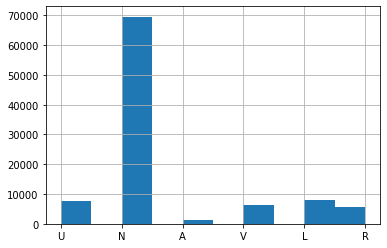

In [ ]:
Xy_df[360].hist()

In [ ]:
with open("/content/train_part1.pkl", "rb") as fp:   # Unpickling
  train_data_list_1 = pickle.load(fp)

In [ ]:
!ls -ltr

total 383104
drwxr-xr-x 1 root root      4096 Apr 29 03:19 sample_data
drwx------ 6 root root      4096 May  2 06:26 drive
-rw-r--r-- 1 root root 108291038 May  2 06:45 new_train.pkl
-rw-r--r-- 1 root root 283993924 May  2 06:52 new_train_pandasDF.pkl


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
allfeats[0][361]

'/content/drive/MyDrive/Spring_22/AInHC/mini_project/mitbih_database/100.csv'

In [ ]:
allfeats[0][361]

'/content/drive/MyDrive/Spring_22/AInHC/mini_project/mitbih_database/100.csv'

Type: N


<Figure size 432x288 with 0 Axes>

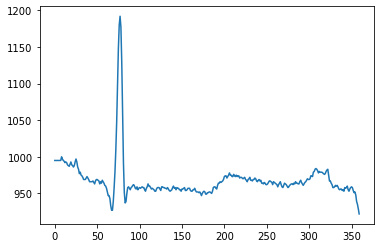

<Figure size 432x288 with 0 Axes>

In [ ]:
print("Type:" , allfeats[1][360])
plt.plot(allfeats[1][:360])
plt.figure()

Type: N


<Figure size 432x288 with 0 Axes>

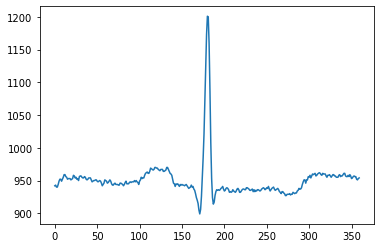

<Figure size 432x288 with 0 Axes>

In [ ]:
print("Type:" , allfeats[40][360])
plt.plot(allfeats[40][:360])
plt.figure()

Type: N


<Figure size 432x288 with 0 Axes>

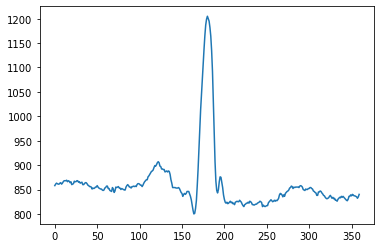

<Figure size 432x288 with 0 Axes>

In [ ]:
print("Type:" , allfeats[40000][360])
plt.plot(allfeats[40000][:360])
plt.figure()

Type: N


<Figure size 432x288 with 0 Axes>

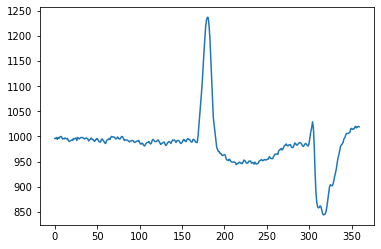

<Figure size 432x288 with 0 Axes>

In [ ]:
print("Type:" , allfeats[67365][360])
plt.plot(allfeats[67365][:360])
plt.figure()

Type: U


<Figure size 432x288 with 0 Axes>

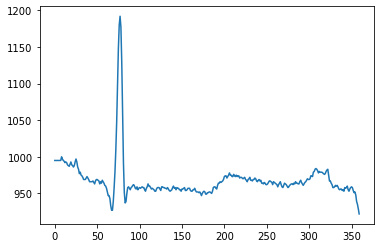

<Figure size 432x288 with 0 Axes>

In [ ]:
print("Type:" , allfeats[0][360])
plt.plot(allfeats[0][:360])
plt.figure()

Type: U


<Figure size 432x288 with 0 Axes>

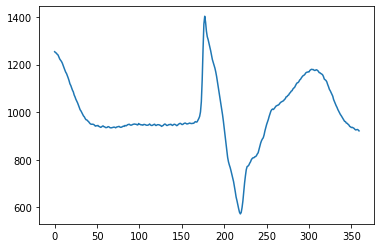

<Figure size 432x288 with 0 Axes>

In [ ]:
print("Type:" , allfeats[12365][360])
plt.plot(allfeats[12365][:360])
plt.figure()

# Exercise 1

In [ ]:
def preprocessor(csv_files, txt_files):
  # Input: List of all csv and txt files.
  # Output: Single dataframe containing entire data.
  # It is best to keep functions short(20 lines max), so feel free to use helper functions here.

In [ ]:
def plotting():
  # Plot a few heartbeats here with proper labelling.

In [ ]:
# Print length of dataframe you got after preprocessing.

# Exercise 2

In [ ]:
def cleaning():
  # Take all the features as input, and do any data cleaning necessary.
  # YOUR CODE HERE

In [ ]:
def normalizer():
  # Taken input the output of cleaning function, and perform data normalization independently for all the features.
  # YOUR CODE HERE

In [ ]:
from sklearn.preprocessing import StandardScaler

# df_new_train_nonan = .values.reshape(-1,1)

# standardising X datapoints
scaler_train = StandardScaler()
scaler_train.fit(X) # computes mean and std for every column, dont do for test
df_new_train_transformed = scaler_train.transform(X)

In [ ]:
df_new_train_transformed

array([[ 0.44070671,  0.44461155,  0.44887847, ..., -0.19682894,
        -0.27059091, -0.35514358],
       [ 0.44070671,  0.44461155,  0.44887847, ..., -0.19682894,
        -0.27059091, -0.35514358],
       [ 0.04891528,  0.04066201,  0.09505653, ...,  0.10234578,
         0.07416287,  0.0579343 ],
       ...,
       [ 0.3891552 ,  0.43425387,  0.48009806, ...,  0.61692631,
         0.54968533,  0.45920996],
       [ 0.3788449 ,  0.41353851,  0.41765889, ...,  0.32971857,
         0.3119241 ,  0.28217658],
       [ 0.50256851,  0.527473  ,  0.57375681, ..., -0.34043281,
        -0.42513571, -0.44956138]])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_numeric = le.fit_transform(y)

In [ ]:
y_numeric


array([4, 2, 2, ..., 2, 2, 2])

In [ ]:
np.array(y == (le.inverse_transform(y_numeric))).all()

True

# Exercise 3

In [ ]:
def class_imbalance_checker():
  # Print number of rows with each heartbeat type, along with plots to represent it.

In [ ]:
def imbalance_remover_1():
  # Implement a method to handle class imbalance.

In [ ]:
def imbalance_remover_2():
  # Implement a method to handle class imbalance.

# Exercise 4

In [ ]:
def noise_remover1():
  # Take input the dataframe and remove noise from it.
  # HINT- pywt library can be helpful.

In [ ]:
def noise_remover2():
  # Take input the dataframe and remove noise from it.


In [ ]:
def autoencoder_noise_remover2():
  # Take input the dataframe and remove noise from it using an autoencoder architecture.


# Exercise 5

In [ ]:
print("*****Splitting data into Features and Target*****")
print("Number of Features :",df_new_train_transformed.shape)
print("Target shape :", y_numeric.shape)

print("\n*****Splitting data into Train and Validation*****")
# Splitting the dataset into train, val and test sets.
# 2.0


X_train, X_val, y_train, y_val = train_test_split(df_new_train_transformed, y_numeric, test_size = 0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state=42)

print("X_train :", X_train.shape)
print("X_val :", X_val.shape)
print("X_test :", X_test.shape)

print("y_train : ",y_train.shape)
print("y_val :", y_val.shape)
print("y_test :", y_test.shape)



*****Splitting data into Features and Target*****
Number of Features : (98401, 360)
Target shape : (98401,)

*****Splitting data into Train and Validation*****
X_train : (68880, 360)
X_val : (14760, 360)
X_test : (14761, 360)
y_train :  (68880,)
y_val : (14760,)
y_test : (14761,)


In [ ]:
# Code for different models used.

def Model1():
  # You can use the sci-kit learn solver but capture any other hyper-parameter settings
  # or model settings in this method
  

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import confusion_matrix

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf_randfor = clf.fit(X_train,y_train)

y_pred_test = clf_randfor.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
rf_score = accuracy_score(y_test, y_pred_test)
print(rf_score)


0.7838899803536346


In [ ]:
from sklearn.metrics import f1_score
f1_score_rf = f1_score(y_test, y_pred_test, average= "weighted")
f1_score_rf

0.7293336002740055

In [ ]:
confusion_matrix(y_test, y_pred_test)

array([[    0,     0,   160,    10,     0,     0],
       [    0,   419,   759,     1,     0,     0],
       [    0,     5, 10404,    25,     0,     0],
       [    0,     0,   582,   276,     0,     0],
       [    0,    30,   650,     3,   472,     0],
       [    0,   317,   616,     7,    25,     0]])

In [ ]:
clf = DecisionTreeClassifier()
clf_decision = clf.fit(X_train,y_train)

In [ ]:
y_pred_test_decision = clf_decision.predict(X_test)

In [ ]:
dt_score = accuracy_score(y_test, y_pred_test_decision)
print(dt_score)


0.9498001490413929


In [ ]:
confusion_matrix(y_test, y_pred_test_decision)

array([[   89,     0,    68,     3,     4,     6],
       [    6,  1110,    29,     0,    14,    20],
       [   78,    29, 10137,    33,   102,    55],
       [    5,     0,    29,   812,     8,     4],
       [    1,     9,    93,     4,  1014,    34],
       [    5,    15,    58,     1,    28,   858]])

In [ ]:
from sklearn.metrics import f1_score
f1_score_dectree = f1_score(y_test, y_pred_test_decision, average= "weighted")
f1_score_dectree

0.950092633093088

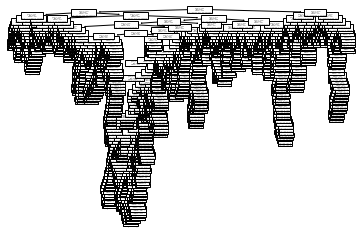

In [ ]:
plot_tree(clf_decision)

feed forward network

In [ ]:
from sklearn.neural_network import MLPClassifier
#clf_mlp = MLPClassifier(solver = 'lbfgs', alpha= 1e-5, hidden_layer_sizes= )

In [ ]:
clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
ypred_mlp = clf_mlp.predict_proba(X_test)
y_pred_test_mlp = clf_mlp.predict(X_test)


In [ ]:
mlp_score = accuracy_score(y_test, y_pred_test_mlp)
print(mlp_score)


0.9808956032789107


In [ ]:
f1_score_mlp = f1_score(y_test, y_pred_test_mlp, average= "weighted")
f1_score_mlp

0.9807526405846189

In [ ]:
confusion_matrix(y_test, y_pred_test_mlp)

array([[  128,     0,    39,     0,     2,     1],
       [    0,  1172,     2,     0,     2,     3],
       [   18,     3, 10363,     1,    44,     5],
       [    1,     0,     3,   847,     6,     1],
       [    3,     3,    60,     0,  1070,    19],
       [    4,     1,    23,     0,    38,   899]])

# Exercise 6

In [ ]:
def Model2():
  # Apply a feed-forward neural network along with hyper-parameter tuning for the same.


In [ ]:
def plotting_ffn():
  # Plotting the curves of training, validation and test sets losses and
  # accuracy scores with number of epochs on the x-axis.

In [ ]:
# Create function which calculates F1score, precision, recall and accuracy score for true and predicted labels.
def metrics(y_pred, y_true):
  pass
  # Takes input the predicted and true labels.
  # Your code here for precision, recall, F1score, accuracy
  # You can call this code to compute metrics for your models

# Exercise 7

In [ ]:
# Add the implementation from a recent paper.

In [ ]:
def plotting_nn():
  # Plotting the curves of training, validation and test sets losses and
  # accuracy scores with number of epochs on the x-axis.

# Exercise 9

In [ ]:
# Running with some other data.
# Call previously defined functions for the new set of input feature values.

# Exercise 10

In [ ]:
def plot_final():
  # lot examples or time-series snippets of
  # mis-classified arrhythmia (False positives) and also false negatives.
